# Very Simple Config Finder for Mithril
- input: target Nth (MAC values), Ad_th, blast_radius, and DDR constraints.
- output: necessary number of Nentry and size of the table (KB).

### 1. Input / Output Definition

In [2]:
import math
import pandas as pd

# Input - Candidates
MAC_list = [1500, 3125, 6250, 12500, 25000, 50000]
#RAAIMT_LIST = [32,64,128,256]
Ad_th = 0

# Constants
tREFW   = 32000000
tREFI   = 3900
num_REF = 8192
tRC     = 48.75
tRFC    = 295
tRFM    = 2*tRC

# Output - Lists
found_config={}


### 2. Equation from Theorem 1

In [3]:
# Function
def calculate_M(N, T, d):
  # R: number of RAAIMT intervals in a tREFW window 
  # m: term for n* in Theorem 2, which is related to Ad_th value
  # M: 
  R = math.floor( float(tREFW - num_REF*tRFC)/float(T*tRC + tRFM) )
  m = math.ceil( float(N*T)/float(T+d) )
  M = 0.0

  # 1. Reduction Region
  partial_sum = 0.0
  for k in range(1,m):
      partial_sum += float(1/float(k))
  M += T*partial_sum
  bits = math.ceil(M)

  # 2. Even Region & Initial Condition
  M += float((R-m)*T - m*d)/float(N)
  M += d + T*(float(N-2)/float(N))
  return [math.floor(M),bits]

### 3. Main Loop for multiple configurations

In [4]:
# Body
def main_runner():
  return_Nentry = 0

  for cur_MAC in MAC_list:
    #print("\n[",cur_nth,"]")
    found_config[cur_MAC] = {}
    for cur_RAAIMT in range(16,512,8):

      for Nentry in range(10,1200,10):
        [M,bits] = calculate_M(Nentry, int(cur_RAAIMT), int(Ad_th))
        #if 3.75*M > cur_nth : # this is for max blast radius, referncing Revisiting Rowhammer & BlockHammer
        if 2*M > cur_MAC :
          return_Nentry = Nentry
        else:
          bits = math.ceil( math.log2(bits) ) + 14
          found_config[cur_MAC][cur_RAAIMT] = return_Nentry
          #print("RESULT: 2*M ",M*2," MAC ",cur_MAC," Nentry ",return_Nentry," cur_RAAIMT ",cur_RAAIMT," sizeKB ",return_Nentry*bits/8192," bits ",bits)
          break

In [5]:
main_runner()

#print(found_config)


Text(0.5, 1.0, 'Hello')

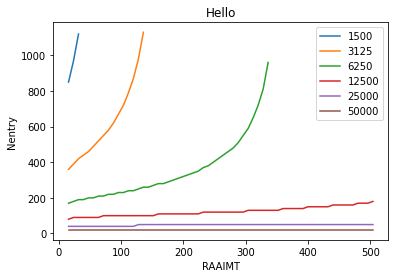

In [8]:
df = pd.DataFrame(found_config)

plt = df.plot()
plt.set_xlabel("RAAIMT")
plt.set_ylabel("Nentry")